In [ ]:
# Core Libraries
!pip install pandas seaborn matplotlib scikit-learn scipy statsmodels plotly geopandas --q
!pip install folium shapely --q

In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patheffects as pe
import matplotlib.lines as mlines # Used for custom legend handles if needed, but not directly for plot lines

import seaborn as sns
from shapely.geometry import box

# Base Map


Shapefile loaded successfully. Districts: 160

Available provinces in the data:
['Azad Kashmir' 'Balochistan' 'Gilgit Baltistan' 'Islamabad'
 'Khyber Pakhtunkhwa' 'Punjab' 'Sindh']

First 5 districts:
        ADM1_EN        ADM2_EN
0  Azad Kashmir           Bagh
1  Azad Kashmir        Bhimber
2  Azad Kashmir  Jhelum Valley
3  Azad Kashmir         Haveli
4  Azad Kashmir          Kotli


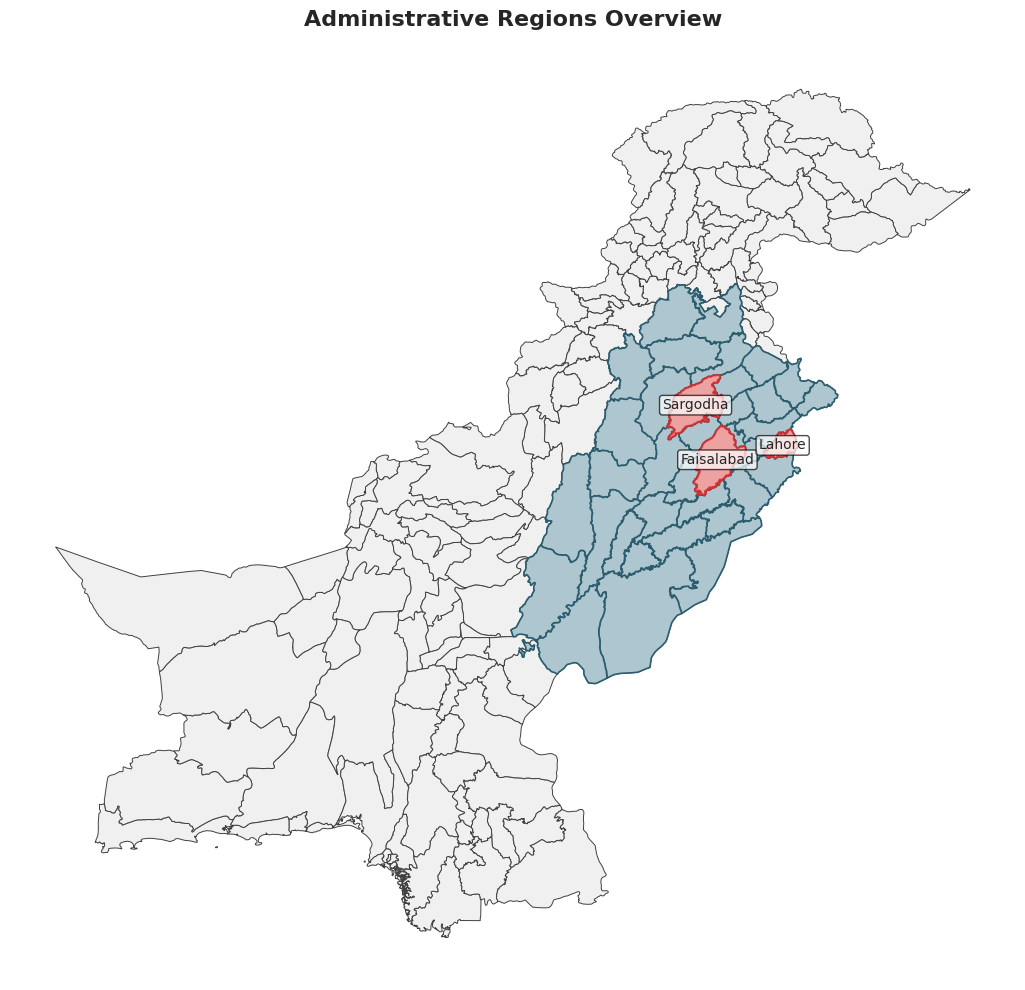


Map saved as 'regions_overview.png'


In [ ]:
def load_shapefile(shapefile_path):
    """Load and validate administrative boundaries shapefile"""
    try:
        gdf = gpd.read_file(shapefile_path)
        print(f"\nShapefile loaded successfully. Districts: {len(gdf)}")
        
        
        print("\nAvailable provinces in the data:")
        print(gdf['ADM1_EN'].unique())
        
        print("\nFirst 5 districts:")
        print(gdf[['ADM1_EN', 'ADM2_EN']].head())
        return gdf
    except Exception as e:
        print(f"\nError loading shapefile: {e}")
        print("Ensure shapefile components (.shp, .shx, .dbf) are in the same directory.")
        return None

def plot_district_map(gdf):
    """Plot administrative districts map"""
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot all districts
    gdf.plot(ax=ax, color='#f0f0f0', edgecolor='#404040', linewidth=0.7)
    
    # Highlight the province containing our regions (use actual name from your data)
    
    province_name = 'Punjab'  
    study_region = gdf[gdf['ADM1_EN'] == province_name]
    
    if not study_region.empty:
        study_region.plot(ax=ax, color='#aec6cf', edgecolor='#2c5d6e', linewidth=1.2)
        
        # Highlight focus districts
        focus_districts = study_region[study_region['ADM2_EN'].isin(['Lahore', 'Faisalabad', 'Sargodha'])]
        
        if not focus_districts.empty:
            focus_districts.plot(ax=ax, color='#ff9896', edgecolor='#d62728', linewidth=1.5, alpha=0.8)
            
            # Add labels
            for idx, row in focus_districts.iterrows():
                centroid = row.geometry.centroid
                ax.text(
                    centroid.x, centroid.y, 
                    row['ADM2_EN'], 
                    fontsize=10, ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2')
                )
        else:
            print("\nWarning: Focus districts not found in study region")
    else:
        print(f"\nWarning: Province '{province_name}' not found in data")
    
    # Configure plot
    ax.set_title('Administrative Regions Overview', fontsize=16, pad=15)
    ax.set_axis_off()
    plt.tight_layout()
    plt.savefig('regions_overview.png', dpi=300, bbox_inches='tight')
    plt.show()
    return True

# Main execution
if __name__ == "__main__":
    # Configure plot style
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': 'DejaVu Sans',
        'axes.titlesize': 14,
        'axes.titleweight': 'bold'
    })
    
    # Set file paths
    shapefile_path = "./pak_adm_wfp_20220909_shp/pak_admbnda_adm2_wfp_20220909.shp"
    
    # Load and validate shapefile
    admin_gdf = load_shapefile(shapefile_path)
    
    # Plot map if data loaded successfully
    if admin_gdf is not None:
        success = plot_district_map(admin_gdf)
        if success:
            print("\nMap saved as 'regions_overview.png'")

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# **Base Map**

Loading map data...
Data loaded.
Map saved to ./figures/pakistan_districts_map.png


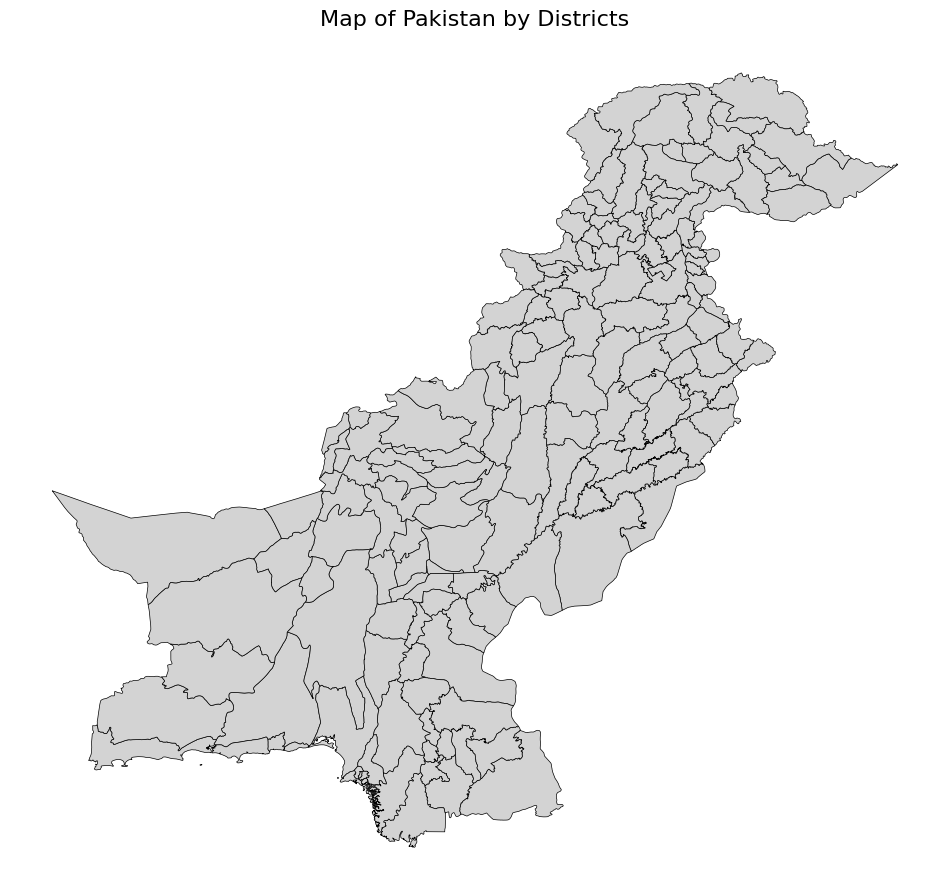

In [3]:
shapefile_path = "./pak_adm_wfp_20220909_shp/pak_admbnda_adm2_wfp_20220909.shp"
output_image_file = "./figures/pakistan_districts_map.png"

# Load, Plot, and Save the Map

try:
    
    print("Loading map data...")
    pakistan_districts_gdf = gpd.read_file(shapefile_path)
    print("Data loaded.")

    # Sets up the plot figure
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    # Draws the districts on the map
    pakistan_districts_gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)

    
    ax.set_title('Map of Pakistan by Districts', fontsize=16)
    ax.set_axis_off()                   # Try commenting this part, seeing is better than explaining

    # Saves the map
    plt.savefig(output_image_file, dpi=300, bbox_inches='tight')
    print(f"Map saved to {output_image_file}")


    plt.show()

except FileNotFoundError:

    print(f"ERROR: Could not find the file at '{shapefile_path}'. Please check the path.")
except Exception as e:
    
    print(f"An unexpected error occurred: {e}")

## **Map With Inset**

--- Loading and preparing map data... ---
--- Generating map... ---
--- Map saved successfully to ./figures/pakistan_punjab_inset_map.png ---


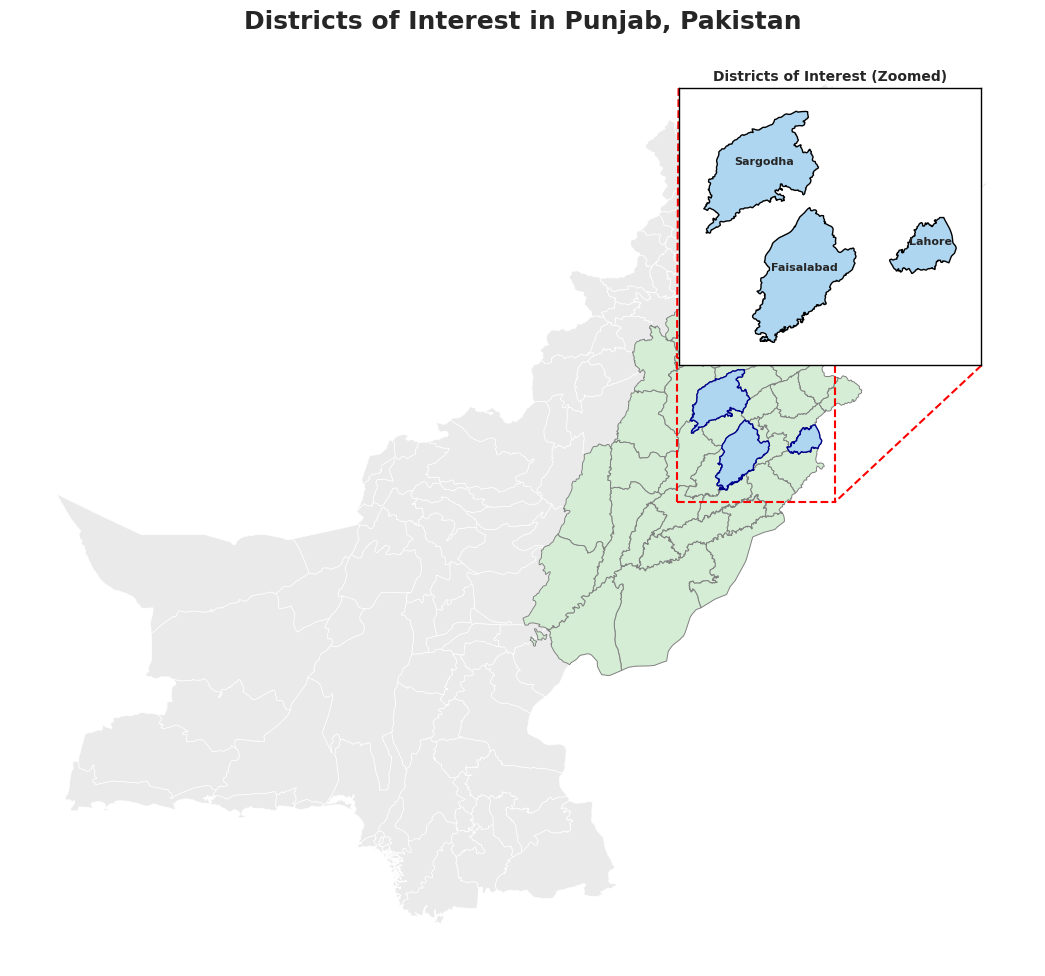

In [7]:
# 'mark_inset' automatically draws the zoom box and connector lines.
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

OUTPUT_IMAGE_FILE = "./figures/pakistan_punjab_inset_map.png"

# geography of interest
PROVINCE_COL = 'ADM1_EN'
DISTRICT_COL = 'ADM2_EN'
TARGET_PROVINCE = 'Punjab'
DISTRICTS_OF_INTEREST = ['Lahore', 'Faisalabad', 'Sargodha']

# map styling
PAKISTAN_COLOR = '#EAEAEA'  # A light gray
PUNJAB_COLOR = '#D4EDD4'    # A light green
DISTRICT_COLOR = '#AED6F1'  # A light blue

# LOAD AND PREPARE DATA
try:
    print("--- Loading and preparing map data... ---")
    # Loads the main shapefile
    gdf_pakistan = gpd.read_file(shapefile_path)

    # Reprojects to a CRS suitable for Pakistan (UTM Zone 43N) for accurate plotting, done to ensure all data is in the same projection.
    gdf_pakistan = gdf_pakistan.to_crs("EPSG:32643")

    # Filters the districts we need
    gdf_punjab = gdf_pakistan[gdf_pakistan[PROVINCE_COL] == TARGET_PROVINCE]
    gdf_selected = gdf_punjab[gdf_punjab[DISTRICT_COL].isin(DISTRICTS_OF_INTEREST)]

    # makes sure we found the districts
    if gdf_selected.empty:
        raise ValueError(f"Could not find districts: {DISTRICTS_OF_INTEREST}. Check spellings.")

    # CREATE THE MAP PLOT
    print("--- Generating map... ---")
    fig, ax_main = plt.subplots(figsize=(15, 12))

    # the main map layers
    # Layer 1: All of Pakistan (the base)
    gdf_pakistan.plot(ax=ax_main, color=PAKISTAN_COLOR, edgecolor='white', linewidth=0.5)

    # Layer 2: Punjab province highlighted
    gdf_punjab.plot(ax=ax_main, color=PUNJAB_COLOR, edgecolor='gray', linewidth=0.7)
    
    # Layer 3: The specific districts of interest highlighted
    gdf_selected.plot(ax=ax_main, color=DISTRICT_COLOR, edgecolor='darkblue', linewidth=1)

    ax_main.set_axis_off()
    ax_main.set_title('Districts of Interest in Punjab, Pakistan', fontsize=18, pad=10)

    # CREATE THE INSET MAP (ZOOMED VIEW)
    # Determine the bounding box for the inset map with padding
    minx, miny, maxx, maxy = gdf_selected.total_bounds
    padding_x = (maxx - minx) * 0.1
    padding_y = (maxy - miny) * 0.1
    inset_extent = [minx - padding_x, miny - padding_y, maxx + padding_x, maxy + padding_y]

    # Create an inset axis in the corner of the main map
    ax_inset = ax_main.inset_axes([0.65, 0.65, 0.30, 0.30])  
                                # [x (Horizontal 0 (left)1(right)), y (Verticl 0(bottom)1(top)), width, height]
    
    # Plot the selected districts on the inset map
    gdf_selected.plot(ax=ax_inset, color=DISTRICT_COLOR, edgecolor='black', linewidth=1)

    # Add district names to the inset map
    for idx, row in gdf_selected.iterrows():
        ax_inset.annotate(text=row[DISTRICT_COL], 
                         xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                         xytext=(3,3), textcoords="offset points", 
                         fontsize=8, ha='center', weight='bold')

    ax_inset.set_xlim(inset_extent[0], inset_extent[2])
    ax_inset.set_ylim(inset_extent[1], inset_extent[3])
    ax_inset.set_title('Districts of Interest (Zoomed)', fontsize=10, weight='bold')
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])
    ax_inset.set_facecolor('white')

    # Add border to inset
    for spine in ax_inset.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)

    # CONNECT THE INSET TO THE MAIN MAP using mark_inset
    mark_inset(parent_axes=ax_main, inset_axes=ax_inset, 
               loc1=2, loc2=4,  # corners to connect (1=top-right, 2=top-left, 3=bottom-left, 4=bottom-right)
               facecolor="none", edgecolor="red", linestyle="--", lw=1.5)

    # SAVE AND SHOW THE FINAL MAP 
    plt.savefig(OUTPUT_IMAGE_FILE, dpi=300, bbox_inches='tight')
    print(f"--- Map saved successfully to {OUTPUT_IMAGE_FILE} ---")
    plt.show()

except Exception as e:
    print(f"\nAn error occurred: {e}")

# **Polished (With better color and inset position)**

--- Loading and preparing map data... ---
--- Generating map... ---


/tmp/ipykernel_6783/1617107136.py:92: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax_main.legend(
/tmp/ipykernel_6783/1617107136.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_main.legend(
/tmp/ipykernel_6783/1617107136.py:179: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


--- Map saved successfully to ./figures/pakistan_punjab_polished_map.png ---


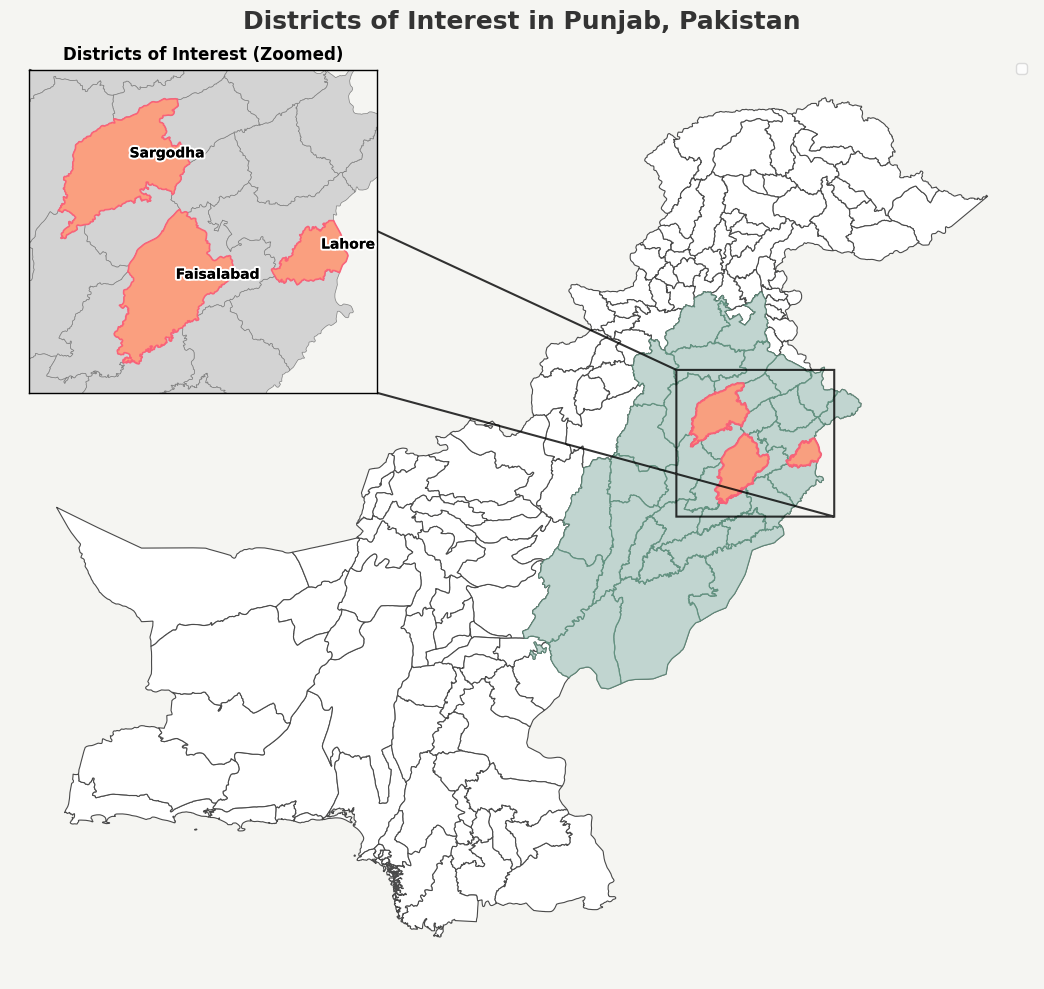

In [8]:
OUTPUT_IMAGE_FILE = "./figures/pakistan_punjab_polished_map.png"

# Geography settings
PROVINCE_COL = 'ADM1_EN'
DISTRICT_COL = 'ADM2_EN'
TARGET_PROVINCE = 'Punjab'
DISTRICTS_OF_INTEREST = ['Lahore', 'Faisalabad', 'Sargodha']

# Style settings
PAKISTAN_COLOR = 'white'
PAKISTAN_BORDER = '#4a4a4a'  # Dark gray
PUNJAB_COLOR = '#a7c4bc'    # Muted green
PUNJAB_BORDER = '#5a8f7b'   # Darker green
DISTRICT_COLOR = '#ff9a76'   # Coral
DISTRICT_BORDER = '#ff5e78'  # Pink-red

# SETUP STYLE
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.facecolor': '#f5f5f2',
    'figure.facecolor': '#f5f5f2',
    'axes.edgecolor': 'white',
    'grid.color': 'grey',
    'grid.alpha': 0.2,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold'
})

# LOAD AND PREPARE DATA (Same as Previous One)
try:
    print("--- Loading and preparing map data... ---")
    # Load the main shapefile
    gdf_pakistan = gpd.read_file(shapefile_path)
    
    # Reproject to UTM Zone 43N
    projected_crs = "EPSG:32643"
    gdf_pakistan_proj = gdf_pakistan.to_crs(projected_crs)
    
    # Filter districts
    gdf_punjab = gdf_pakistan_proj[gdf_pakistan_proj[PROVINCE_COL] == TARGET_PROVINCE]
    gdf_selected = gdf_punjab[gdf_punjab[DISTRICT_COL].isin(DISTRICTS_OF_INTEREST)]
    
    if gdf_selected.empty:
        raise ValueError(f"Could not find districts: {DISTRICTS_OF_INTEREST}. Check spellings.")

    # CREATE THE MAP PLOT (Same as before Just added Facecolor)
    print("--- Generating map... ---")
    fig, ax_main = plt.subplots(figsize=(15, 10), facecolor='#f5f5f2') 
    


    # MAIN MAP LAYERS (imp changes add Zorder)
    # 1. Pakistan Base
    gdf_pakistan_proj.plot(
        ax=ax_main,
        color=PAKISTAN_COLOR,
        edgecolor=PAKISTAN_BORDER,
        linewidth=0.8,
        zorder=1
    )
    
    # 2. Punjab Highlight
    gdf_punjab.plot(
        ax=ax_main,
        color=PUNJAB_COLOR,
        edgecolor=PUNJAB_BORDER,
        linewidth=0.8,
        alpha=0.7,
        zorder=2,
        label='Punjab'
    )
    
    # 3. Selected Districts
    gdf_selected.plot(
        ax=ax_main,
        color=DISTRICT_COLOR,
        edgecolor=DISTRICT_BORDER,
        linewidth=1.5,
        alpha=0.9,
        zorder=3,
        label='Focus Districts'
    )
    
    # MAIN MAP STYLING
    ax_main.set_title(
        'Districts of Interest in Punjab, Pakistan',
        pad=20,
        fontsize=18,
        color='#333333'
    )
    ax_main.legend(
        loc='upper right',
        frameon=True,
        facecolor='white',
        edgecolor='lightgray'
    )
    ax_main.set_axis_off()
    
    # CREATE INSET MAP (Imp Changes here)
    # Calculate extent with padding
    minx, miny, maxx, maxy = gdf_selected.total_bounds
    padding = 0.1 * (maxx - minx)
    inset_extent = [minx - padding, miny - padding, maxx + padding, maxy + padding]
    
    # Create inset axes (positioned upper left)
    ax_inset = inset_axes(
        ax_main,
        width="35%",
        height="35%",
        loc='upper left',
        borderpad=1
    )
    
    # INSET LAYERS
    # 1. Punjab background
    gdf_punjab.plot(
        ax=ax_inset,
        color='lightgray',
        edgecolor='gray',
        linewidth=0.5,
        zorder=1
    )
    
    # 2. Selected districts
    gdf_selected.plot(
        ax=ax_inset,
        color=DISTRICT_COLOR,
        edgecolor=DISTRICT_BORDER,
        linewidth=1.2,
        alpha=0.9,
        zorder=2
    )
    
    # DISTRICT LABELS (with halo effect)
    for idx, row in gdf_selected.iterrows():
        centroid = row.geometry.centroid
        ax_inset.annotate(
            text=row[DISTRICT_COL],
            xy=(centroid.x, centroid.y),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=10,
            weight='bold',
            color='black',
            path_effects=[
                pe.withStroke(linewidth=3, foreground='white'),
                pe.Normal()
            ]
        )
    
    # INSET STYLING
    ax_inset.set_xlim(inset_extent[0], inset_extent[2])
    ax_inset.set_ylim(inset_extent[1], inset_extent[3])
    ax_inset.set_title(
        'Districts of Interest (Zoomed)',
        fontsize=12,
        pad=8,
        weight='bold'
    )
    ax_inset.set_xticks([])
    ax_inset.set_yticks([])
    
    # Inset border styling
    for spine in ax_inset.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1.0)
    
    # CONNECTION INDICATOR
    ax_main.indicate_inset_zoom(
        ax_inset,
        edgecolor="black",
        linewidth=1.5,
        linestyle='-',
        alpha=0.8
    )
    
    # SAVE
    plt.tight_layout()
    plt.savefig(
        OUTPUT_IMAGE_FILE,
        dpi=300,
        bbox_inches='tight',
        facecolor='#f5f5f2'
    )
    print(f"--- Map saved successfully to {OUTPUT_IMAGE_FILE} ---")
    plt.show()

except Exception as e:
    print(f"\nAn error occurred: {e}")

# **Final**

Loading and preparing map data...
Generating visualization...
--- Visualization saved to ./figures/figure3_spatial_distribution_key_metrics.png ---


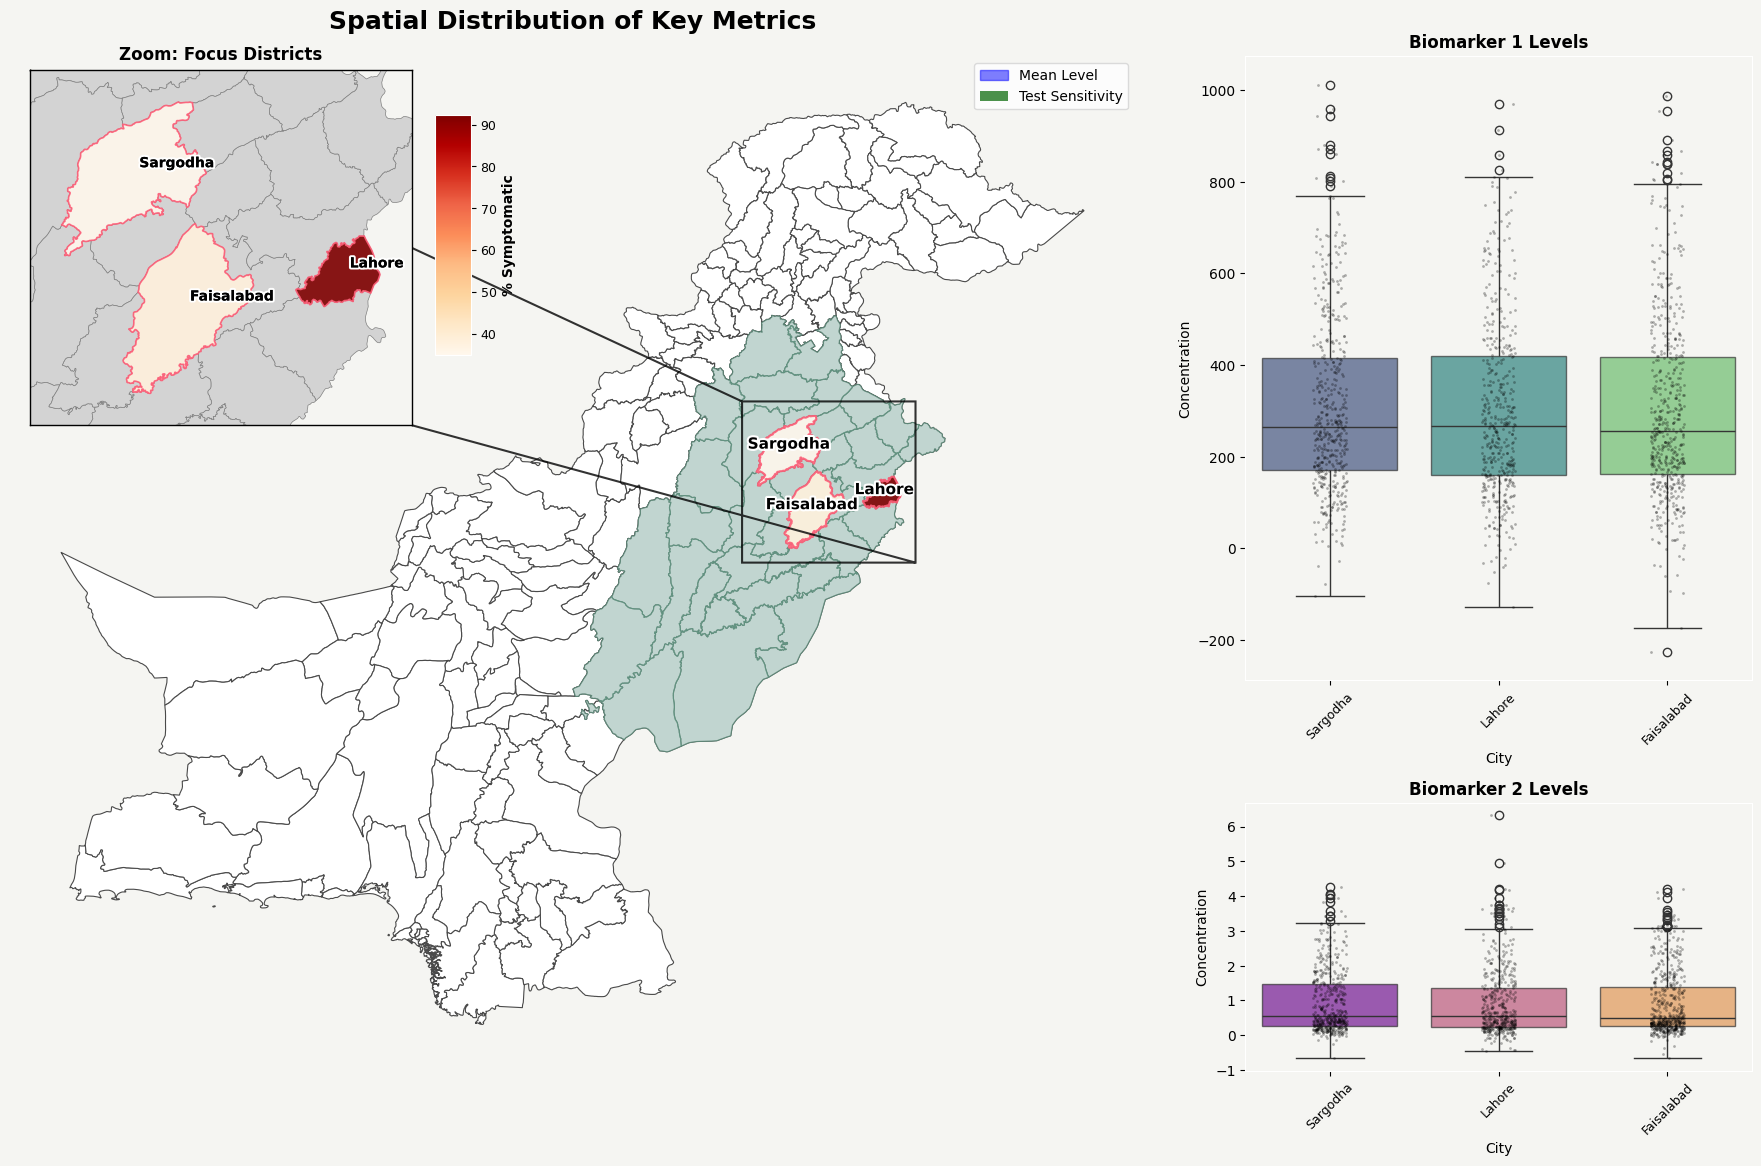

In [24]:
# Ignore all warnings
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings("ignore")

OUTPUT_IMAGE_FILE = "./figures/figure3_spatial_distribution_key_metrics.png"

# Geography settings
PROVINCE_COL = 'ADM1_EN'
DISTRICT_COL = 'ADM2_EN'
TARGET_PROVINCE = 'Punjab'
DISTRICTS_OF_INTEREST = ['Lahore', 'Faisalabad', 'Sargodha']

# Style settings
PAKISTAN_COLOR = 'white'
PAKISTAN_BORDER = '#4a4a4a'
PUNJAB_COLOR = '#a7c4bc'
PUNJAB_BORDER = '#5a8f7b'
DISTRICT_COLOR = '#ff9a76'
DISTRICT_BORDER = '#ff5e78'

# SETUP STYLE
plt.style.use('default')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'axes.facecolor': '#f5f5f2',
    'figure.facecolor': '#f5f5f2',
    'axes.edgecolor': 'white',
    'grid.color': 'grey',
    'grid.alpha': 0.2,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold'
})

# LOAD AND PREPARE DATA
try:
    print("Loading and preparing map data...")
    
    gdf_pakistan = gpd.read_file(shapefile_path)
    city_metrics = pd.read_csv('./Boxplot related matrices for map/city_metrics_summary.csv')
    boxplot_data = pd.read_csv('./Boxplot related matrices for map/boxplot_data_for_inset.csv')

    gdf_punjab = gdf_pakistan[gdf_pakistan[PROVINCE_COL] == TARGET_PROVINCE].copy()
    gdf_selected = gdf_punjab[gdf_punjab[DISTRICT_COL].isin(DISTRICTS_OF_INTEREST)].copy()

    projected_crs = "EPSG:32643"
    gdf_pakistan_proj = gdf_pakistan.to_crs(projected_crs)
    gdf_punjab_proj = gdf_punjab.to_crs(projected_crs)
    gdf_selected_proj = gdf_selected.to_crs(projected_crs)

    gdf_selected_proj = gdf_selected_proj.merge(city_metrics, on='ADM2_EN', how='left')

except Exception as e:
    print(f"\nError loading data: {e}")
    exit()

# CREATE FIGURE WITH GRIDSPEC
print("Generating visualization...")
fig = plt.figure(figsize=(18, 12), facecolor='#f5f5f2')
gs = fig.add_gridspec(nrows=2, ncols=2, height_ratios=[0.7, 0.3], width_ratios=[0.7, 0.3])

ax_main = fig.add_subplot(gs[:, 0])

# Base layers
gdf_pakistan_proj.plot(ax=ax_main, color=PAKISTAN_COLOR, edgecolor=PAKISTAN_BORDER, linewidth=0.8, zorder=1)
gdf_punjab_proj.plot(ax=ax_main, color=PUNJAB_COLOR, edgecolor=PUNJAB_BORDER, linewidth=0.8, alpha=0.7, zorder=2)

# District choropleth layer
cmap = plt.cm.get_cmap('OrRd')
norm = plt.Normalize(gdf_selected_proj['% Symptomatic'].min(), gdf_selected_proj['% Symptomatic'].max())
gdf_selected_proj.plot(ax=ax_main, column='% Symptomatic', cmap=cmap, edgecolor=DISTRICT_BORDER, linewidth=1.5, alpha=0.9, zorder=3)

# Colorbar
cbar_ax = fig.add_axes([0.26, 0.68, 0.02, 0.2])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(gdf_selected_proj['% Symptomatic'])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')        
cbar.set_label('% Symptomatic', fontsize=10, weight='bold')
cbar.ax.tick_params(labelsize=9)

# Metric Visuals
il6_size_scale = 1
rat_height_scale = 0.0005
for idx, row in gdf_selected_proj.iterrows():
    centroid = row.geometry.centroid
    circle_radius = np.sqrt(row['Mean Level'] / np.pi) * il6_size_scale / 2
    ax_main.add_patch(plt.Circle((centroid.x, centroid.y), radius=circle_radius, color='blue', alpha=0.5, zorder=4))
    bar_height = row['Test Sensitivity'] * rat_height_scale * 15
    ax_main.add_patch(plt.Rectangle((centroid.x + circle_radius * 0.7, centroid.y - bar_height/2),
                                   circle_radius * 0.5, bar_height, color='darkgreen', alpha=0.7, zorder=5))
    ax_main.annotate(text=row[DISTRICT_COL],
                     xy=(centroid.x, centroid.y + circle_radius + 0.5 * bar_height),
                     fontsize=11, ha='center', weight='bold',
                     path_effects=[pe.withStroke(linewidth=3, foreground='white')])

ax_main.set_title('Spatial Distribution of Key Metrics', fontsize=18, pad=20)
ax_main.set_axis_off()

legend_elements = [
    plt.Circle((0,0), 0.5, color='blue', alpha=0.5, label='Mean Level'),
    Patch(facecolor='darkgreen', alpha=0.7, label='Test Sensitivity')
]
ax_main.legend(handles=legend_elements, loc='upper right', frameon=True, facecolor='white', edgecolor='lightgray')

# GEOGRAPHICAL INSET
minx, miny, maxx, maxy = gdf_selected_proj.total_bounds
padding_geo_inset = 0.1 * (maxx - minx)
geo_inset_extent = [minx - padding_geo_inset, miny - padding_geo_inset, maxx + padding_geo_inset, maxy + padding_geo_inset]

ax_geo_inset = inset_axes(ax_main, width="35%", height="35%", loc='upper left', borderpad=1, bbox_transform=ax_main.transAxes)
gdf_punjab_proj.plot(ax=ax_geo_inset, color='lightgray', edgecolor='gray', linewidth=0.5)
gdf_selected_proj.plot(ax=ax_geo_inset, column='% Symptomatic', cmap=cmap, norm=norm, edgecolor=DISTRICT_BORDER, linewidth=1.2, alpha=0.9)

for idx, row in gdf_selected_proj.iterrows():
    centroid = row.geometry.centroid
    ax_geo_inset.annotate(row[DISTRICT_COL], xy=(centroid.x, centroid.y), xytext=(5, 5), textcoords="offset points", fontsize=10, weight='bold', color='black', path_effects=[pe.withStroke(linewidth=3, foreground='white'), pe.Normal()])

ax_geo_inset.set_xlim(geo_inset_extent[0], geo_inset_extent[2])
ax_geo_inset.set_ylim(geo_inset_extent[1], geo_inset_extent[3])
ax_geo_inset.set_title('Zoom: Focus Districts', fontsize=12, pad=8, weight='bold')
ax_geo_inset.set_xticks([])
ax_geo_inset.set_yticks([])
for spine in ax_geo_inset.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

ax_main.indicate_inset_zoom(ax_geo_inset, edgecolor="black", linewidth=1.5, linestyle='-', alpha=0.8)

# BOXPLOT INSETS
ax_bp1 = fig.add_subplot(gs[0, 1])
ax_bp2 = fig.add_subplot(gs[1, 1])

sns.boxplot(x='City', y='Biomarker 1', data=boxplot_data, ax=ax_bp1, palette='viridis', boxprops={'alpha': 0.7})
sns.stripplot(x='City', y='Biomarker 1', data=boxplot_data, ax=ax_bp1, color='black', size=2, alpha=0.3)
ax_bp1.set_title('Biomarker 1 Levels', fontsize=12, weight='bold')
ax_bp1.set_ylabel('Concentration', fontsize=10)
ax_bp1.tick_params(axis='x', rotation=45, labelsize=9)

sns.boxplot(x='City', y='Biomarker 2', data=boxplot_data, ax=ax_bp2, palette='plasma', boxprops={'alpha': 0.7})
sns.stripplot(x='City', y='Biomarker 2', data=boxplot_data, ax=ax_bp2, color='black', size=2, alpha=0.3)
ax_bp2.set_title('Biomarker 2 Levels', fontsize=12, weight='bold')
ax_bp2.set_xlabel('City', fontsize=10)
ax_bp2.set_ylabel('Concentration', fontsize=10)
ax_bp2.tick_params(axis='x', rotation=45, labelsize=9)

# FINAL OUTPUT
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(OUTPUT_IMAGE_FILE, dpi=300, bbox_inches='tight', facecolor='#f5f5f2')
print(f"--- Visualization saved to {OUTPUT_IMAGE_FILE} ---")
plt.show()